# This notebook creates a square lattice geometry of cylindrical fuel pins with an empty region in the center.

**See the final geomtry at the end of the notebook to understand what we are doing here.** This is a derivative work of the [BWR](https://nbviewer.org/github/mit-crpg/openmc-reactor-examples/blob/main/BWR.ipynb) example from OpenMC Documentation.

#### This is a 2D design for simplicity. To make this 3D, use the `top` and `bottom` planes to the region definitions of the cells.
See In[3].

In [1]:
%matplotlib inline
import openmc

## The following cell defines the materials used here.

In [2]:
uo2 = openmc.Material(1, "uo2")
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.0)

zirconium = openmc.Material(name="zirconium")
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

water = openmc.Material(name="h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')


materials = openmc.Materials([uo2, zirconium, water])
materials.export_to_xml()

## The following cells define the geometry

This cell below states the *fuel, clad inner and clad outer radius* as well as the *pitch* for the fuel rods.

**NB: The `top` and `bottom` planes are not used here as the model is two dimensional.**
To make this 3D just add these two planes to the definitions of the cell regions.

In [3]:
fuel_outer_radius = openmc.ZCylinder(r=0.39)
clad_inner_radius = openmc.ZCylinder(r=0.40)
clad_outer_radius = openmc.ZCylinder(r=0.46)

#top    = openmc.ZPlane(z0= 1, boundary_type="reflective") # not used. see note
#bottom = openmc.ZPlane(z0=-1, boundary_type="reflective") # not used

pitch  = 1.2
pin_cell_box = openmc.rectangular_prism(width=pitch, height=pitch)

In [4]:
fuel_region  = -fuel_outer_radius
gap_region   = +fuel_outer_radius & -clad_inner_radius
clad_region  = +clad_inner_radius & -clad_outer_radius
water_region = pin_cell_box & +clad_outer_radius

In [5]:
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(name='air gap')
gap.region = gap_region

clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region

moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region

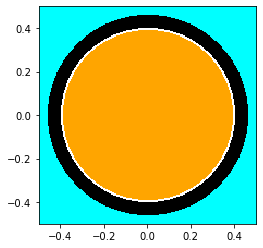

In [6]:
fuel_pin_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))
fuel_pin_universe.plot(width=(1,1), colors = {fuel: 'orange', gap: 'white', clad: 'black', moderator: 'cyan'})

### Now, as the model of  a single fuel rod is done, we focus on creating the 

The following cell creates a pin cell filled with water.

In [7]:
fully_water_pincell = openmc.Cell(name="full water")
fully_water_pincell.region = pin_cell_box
fully_water_pincell.fill = water

full_water_pinuniverse = openmc.Universe(cells=[fully_water_pincell])

### This cell defines a cell with a sleave of zirconium on the upper section which will constitute the inner square later.

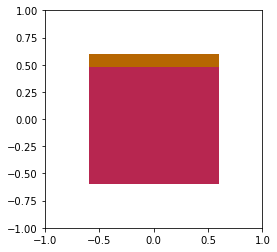

In [8]:
sleave_thickness = 0.12 # two times clad thickness


us_water_cell = openmc.Cell(name="Upper Sleave pin water cell")
us_water_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2-sleave_thickness) & +openmc.YPlane(y0=-pitch/2)
us_water_cell.fill = water

us_sleave_cell = openmc.Cell(name="Upper Sleave pin sleave cell")
us_sleave_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=pitch/2 - sleave_thickness)
us_sleave_cell.fill = zirconium

us_sleave_universe = openmc.Universe(cells=[us_water_cell, us_sleave_cell])

us_sleave_universe.plot(width=(2,2))

### Cell with a sleave at the lower part

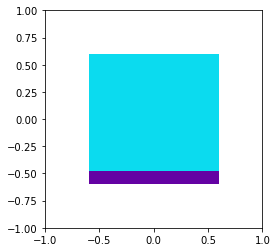

In [9]:
ls_water_cell = openmc.Cell(name="Lower Sleave pin water cell")
ls_water_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2 + sleave_thickness)
ls_water_cell.fill = water

ls_sleave_cell = openmc.Cell(name="Lower Sleave pin sleave cell")
ls_sleave_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=sleave_thickness-pitch/2) & +openmc.YPlane(y0=-pitch/2)
ls_sleave_cell.fill = zirconium

ls_sleave_universe = openmc.Universe(cells=[ls_water_cell, ls_sleave_cell])

ls_sleave_universe.plot(width=(2,2))

### Sleave at the right

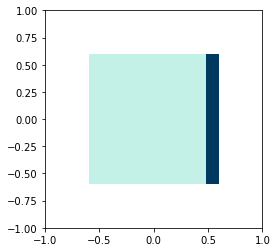

In [10]:
rs_water_cell = openmc.Cell(name="Right Sleave pin water cell")
rs_water_cell.region = -openmc.XPlane(x0=pitch/2-sleave_thickness) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2)
rs_water_cell.fill = water

rs_sleave_cell = openmc.Cell(name="Right Sleave pin sleave cell")
rs_sleave_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=pitch/2-sleave_thickness) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2)
rs_sleave_cell.fill = zirconium

rs_sleave_universe = openmc.Universe(cells=[rs_water_cell, rs_sleave_cell])

rs_sleave_universe.plot(width=(2,2))

### Sleave at the left

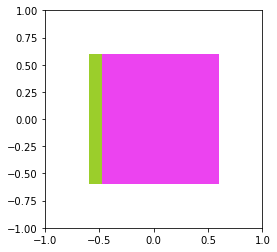

In [11]:
lft_water_cell = openmc.Cell(name="Left Sleave pin water cell")
lft_water_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2 + sleave_thickness) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2)
lft_water_cell.fill = water

lft_sleave_cell = openmc.Cell(name="Left Sleave pin sleave cell")
lft_sleave_cell.region = -openmc.XPlane(x0=sleave_thickness-pitch/2) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2)
lft_sleave_cell.fill = zirconium

lft_sleave_universe = openmc.Universe(cells=[lft_water_cell, lft_sleave_cell])

lft_sleave_universe.plot(width=(2,2))

### Sleave at the Upper-Left

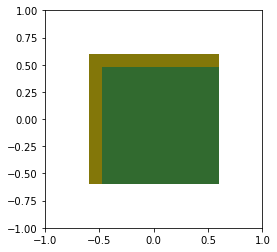

In [12]:
upper_left_water_cell = openmc.Cell(name="Upper left Sleave pin water cell")
upper_left_water_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2 + sleave_thickness) & -openmc.YPlane(y0=pitch/2-sleave_thickness) & +openmc.YPlane(y0=-pitch/2)
upper_left_water_cell.fill = water

upper_left_sleave_cell = openmc.Cell(name="Upper left Sleave pin sleave cell")
upper_left_sleave_cell.region = us_sleave_cell.region | lft_sleave_cell.region
upper_left_sleave_cell.fill = zirconium

upper_left_sleave_universe = openmc.Universe(cells=[upper_left_water_cell, upper_left_sleave_cell])

upper_left_sleave_universe.plot(width=(2,2))

### Sleave at the Upper-Right

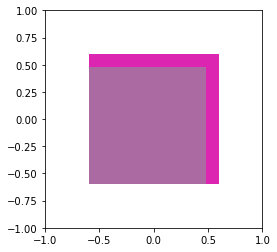

In [13]:
upper_right_water_cell = openmc.Cell(name="Upper right Sleave pin water cell")
upper_right_water_cell.region = -openmc.XPlane(x0=pitch/2-sleave_thickness) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2-sleave_thickness) & +openmc.YPlane(y0=-pitch/2)
upper_right_water_cell.fill = water

upper_right_sleave_cell = openmc.Cell(name="Upper right Sleave pin sleave cell")
upper_right_sleave_cell.region = us_sleave_cell.region | rs_sleave_cell.region
upper_right_sleave_cell.fill = zirconium

upper_right_sleave_universe = openmc.Universe(cells=[upper_right_water_cell, upper_right_sleave_cell])

upper_right_sleave_universe.plot(width=(2,2))

### Sleave at the Lower-Right

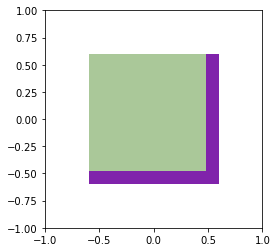

In [14]:
lower_right_water_cell = openmc.Cell(name="lower right Sleave pin water cell")
lower_right_water_cell.region = -openmc.XPlane(x0=pitch/2-sleave_thickness) & +openmc.XPlane(x0=-pitch/2) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2+sleave_thickness)
lower_right_water_cell.fill = water

lower_right_sleave_cell = openmc.Cell(name="lower right Sleave pin sleave cell")
lower_right_sleave_cell.region = ls_sleave_cell.region | rs_sleave_cell.region
lower_right_sleave_cell.fill = zirconium

lower_right_sleave_universe = openmc.Universe(cells=[lower_right_water_cell, lower_right_sleave_cell])

lower_right_sleave_universe.plot(width=(2,2))

### Sleave at Lower-Left

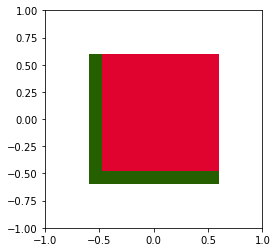

In [15]:
lower_left_water_cell = openmc.Cell(name="lower left Sleave pin water cell")
lower_left_water_cell.region = -openmc.XPlane(x0=pitch/2) & +openmc.XPlane(x0=-pitch/2+sleave_thickness) & -openmc.YPlane(y0=pitch/2) & +openmc.YPlane(y0=-pitch/2+sleave_thickness)
lower_left_water_cell.fill = water

lower_left_sleave_cell = openmc.Cell(name="lower left Sleave pin sleave cell")
lower_left_sleave_cell.region = ls_sleave_cell.region | lft_sleave_cell.region
lower_left_sleave_cell.fill = zirconium

lower_left_sleave_universe = openmc.Universe(cells=[lower_left_water_cell, lower_left_sleave_cell])

lower_left_sleave_universe.plot(width=(2,2))

## Now the assembly is defined using the previously modelled pin universes.
It is a 7\*7 lattice and all the pins are written explicitly.

**A sleave is also generated to around the whole assembly.**

In [16]:
assembly_pitch = pitch * 7

assembly = openmc.RectLattice(name='Assembly Lattice')
assembly.pitch = (pitch, pitch)
assembly.lower_left = [-assembly_pitch/2, -assembly_pitch/2]

assembly.universes = [
    [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, ],
    [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, ],
    [fuel_pin_universe, fuel_pin_universe, upper_left_sleave_universe, us_sleave_universe, upper_right_sleave_universe, fuel_pin_universe, fuel_pin_universe],
    [fuel_pin_universe, fuel_pin_universe, lft_sleave_universe, full_water_pinuniverse, rs_sleave_universe, fuel_pin_universe, fuel_pin_universe],
    [fuel_pin_universe, fuel_pin_universe, lower_left_sleave_universe, ls_sleave_universe, lower_right_sleave_universe, fuel_pin_universe, fuel_pin_universe],
    [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, ],
    [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, ]
]
assembly_region = openmc.rectangular_prism(width=assembly_pitch, height=assembly_pitch, origin=(0,0))
assembly_cell = openmc.Cell(name='assembly cell', fill=assembly, region=assembly_region)

assembly_sleave = openmc.Cell(name='assembly sleave')
assembly_sleave.region = openmc.rectangular_prism(width=assembly_pitch+2*sleave_thickness, height=assembly_pitch+2*sleave_thickness) & ~assembly_cell.region
assembly_sleave.fill = zirconium

assembly_outer_water = openmc.Cell(name='assembly outer water')
assembly_outer_water.region = ~assembly_sleave.region & ~assembly_cell.region & openmc.rectangular_prism(width=assembly_pitch+2*sleave_thickness+1, height=assembly_pitch+2*sleave_thickness+1, boundary_type='reflective')
assembly_outer_water.fill = water

assembly_universe = openmc.Universe(cells=[assembly_cell, assembly_sleave, assembly_outer_water])

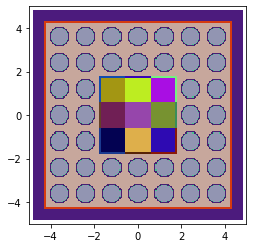

In [17]:
assembly_universe.plot(width=(10,10))

In [18]:
geom = openmc.Geometry(assembly_universe)
geom.export_to_xml()

## This creates a plot with hight resolution and colored my material.
Find the plot on the directory where this notebook file is located.

In [19]:
plot = openmc.Plot()
plot.basis = 'xy'
plot.origin = (1, 1, 0)
plot.width = (15., 15.)
plot.pixels = (5000, 5000) # Change the resolution if needed.
plot.color_by = 'material'
plot.colors = {
    water: 'cyan',
    uo2: 'yellow',
    zirconium: 'black'
}
plots = openmc.Plots([plot])
plots.export_to_xml()
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

## The following cells are dummy to simply run the simulation.

In [20]:
# Create a point source
point = openmc.stats.Point((0, 0, 0))
source = openmc.Source(space=point)

In [21]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [22]:
settings.export_to_xml()

In [23]:
cell_filter = openmc.CellFilter(fuel)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

tally.nuclides = ['U235']
tally.scores = ['total', 'fission', 'absorption', '(n,gamma)']

tallies = openmc.Tallies([tally])
tallies.export_to_xml()

In [24]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

# End